Load all packages you need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read the data.

In [2]:
# Load the data
file_path = '../data/diabetes.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

Inspect the histogram of "BloodPressure". What could be outlier values?

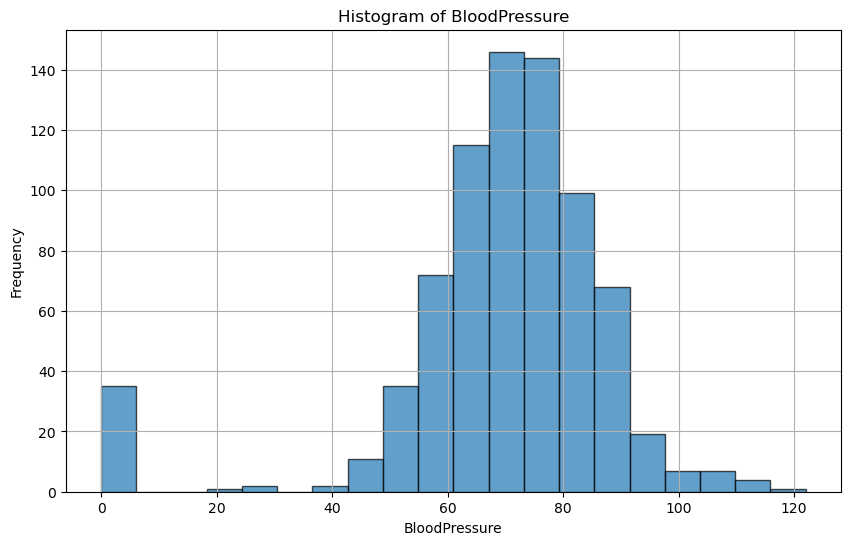

In [3]:
# Create a histogram of the "BloodPressure" variable
plt.figure(figsize=(10, 6))
plt.hist(df['BloodPressure'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From the histogram of "BloodPressure", it appears that there are some potential outlier values. Specifically:

1. **BloodPressure values around 0**: These values are likely to be outliers or data entry errors, as a blood pressure of 0 is not physiologically possible.
2. **BloodPressure values above 100**: While high blood pressure values can occur, values significantly above 100 may be considered outliers depending on the context and population being studied.


Do you think the zero values are an outlier or missing data? How would the histogram look like without the zero values? Are there still outlier visible?

The zero values in the "BloodPressure" variable are likely to be missing data rather than true outliers, as a blood pressure of 0 is not physiologically possible.

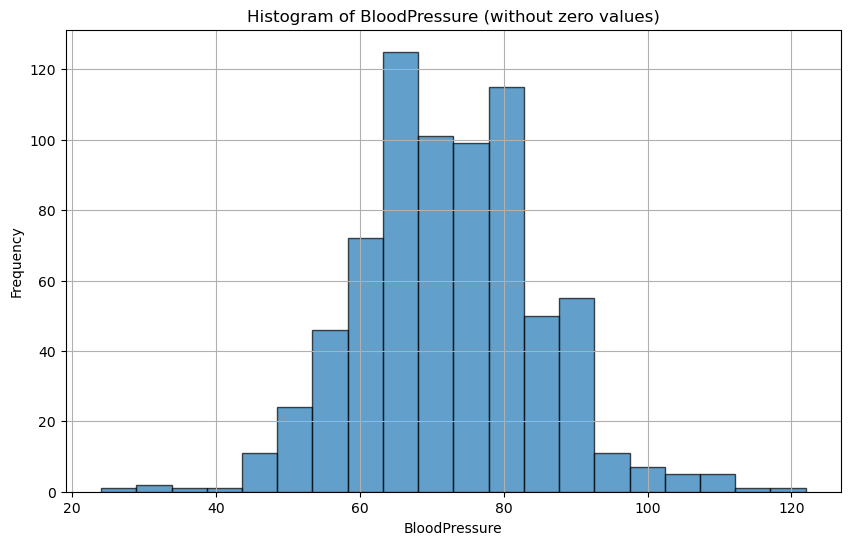

In [4]:
# Filter out zero values in "BloodPressure"
df_filtered = df[df['BloodPressure'] > 0]

# Create a histogram of the "BloodPressure" variable without zero values
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['BloodPressure'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of BloodPressure (without zero values)')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Let's use some more fine-grained methods to detect outlier. Create a Boxplot of "BloodPressure" and see if Tukey's fence reveals outlier!

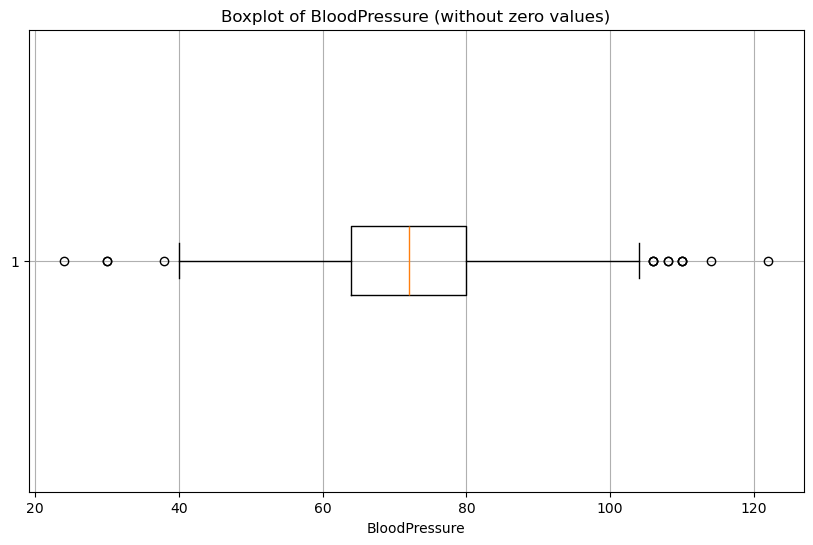

Lower fence: 40.0
Upper fence: 104.0
Outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
18             1      103             30             38       83  43.3   
43             9      171            110             24      240  45.4   
84             5      137            108              0        0  48.8   
106            1       96            122              0        0  22.4   
125            1       88             30             42       99  55.0   
177            0      129            110             46      130  67.1   
362            5      103            108             37        0  39.2   
549            4      189            110             31        0  28.5   
597            1       89             24             19       25  27.8   
599            1      109             38             18      120  23.1   
658           11      127            106              0        0  39.0   
662            8      167            106             46      231 

In [5]:
# Filter out zero values in "BloodPressure"
df_filtered = df[df['BloodPressure'] > 0]

# Create a boxplot of the "BloodPressure" variable
plt.figure(figsize=(10, 6))
plt.boxplot(df_filtered['BloodPressure'], vert=False)
plt.title('Boxplot of BloodPressure (without zero values)')
plt.xlabel('BloodPressure')
plt.grid(True)
plt.show()

# Calculate Tukey's fences
Q1 = df_filtered['BloodPressure'].quantile(0.25)
Q3 = df_filtered['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f"Lower fence: {lower_fence}")
print(f"Upper fence: {upper_fence}")

# Identify outliers
outliers = df_filtered[(df_filtered['BloodPressure'] < lower_fence) | (df_filtered['BloodPressure'] > upper_fence)]
print(f"Outliers:\n{outliers}")

GitHub Copilot
The boxplot of "BloodPressure" without zero values reveals the following:

Boxplot Interpretation:

The box represents the interquartile range (IQR), which contains the middle 50% of the data.
The line inside the box represents the median of the data.
The "whiskers" extend to 1.5 times the IQR from the quartiles.
Points outside the whiskers are considered potential outliers.
Tukey's Fence:

Lower fence: ( Q1 - 1.5 \times IQR )
Upper fence: ( Q3 + 1.5 \times IQR )
Any data points outside these fences are considered outliers.
Outliers:

The circles outside the whiskers represent outliers.
In this case, there are outliers on both the lower and upper ends of the "BloodPressure" values.
Specific Outliers:

Lower outliers: BloodPressure values below approximately 40.
Upper outliers: BloodPressure values above approximately 100.

Can you think of a way to visualize the ±3SD method to detect outlier?

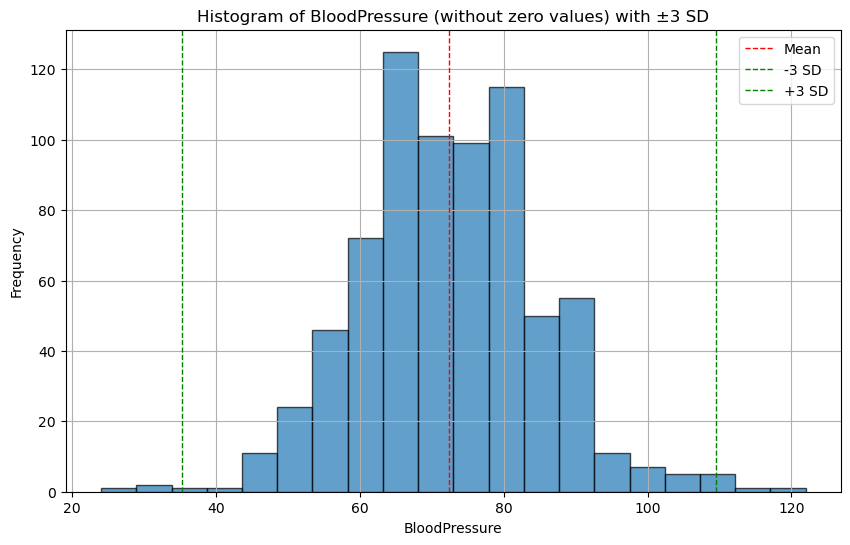

Mean BloodPressure: 72.40518417462484
Standard Deviation of BloodPressure: 12.38215821010526
Lower threshold (-3 SD): 35.258709544309056
Upper threshold (+3 SD): 109.55165880494062


In [6]:
# Filter out zero values in "BloodPressure"
df_filtered = df[df['BloodPressure'] > 0]

# Calculate mean and standard deviation
mean_bp = df_filtered['BloodPressure'].mean()
std_bp = df_filtered['BloodPressure'].std()

# Calculate ±3 SD thresholds
lower_threshold = mean_bp - 3 * std_bp
upper_threshold = mean_bp + 3 * std_bp

# Create a histogram of the "BloodPressure" variable without zero values
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['BloodPressure'], bins=20, edgecolor='k', alpha=0.7)
plt.axvline(mean_bp, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(lower_threshold, color='g', linestyle='dashed', linewidth=1, label='-3 SD')
plt.axvline(upper_threshold, color='g', linestyle='dashed', linewidth=1, label='+3 SD')
plt.title('Histogram of BloodPressure (without zero values) with ±3 SD')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean BloodPressure: {mean_bp}")
print(f"Standard Deviation of BloodPressure: {std_bp}")
print(f"Lower threshold (-3 SD): {lower_threshold}")
print(f"Upper threshold (+3 SD): {upper_threshold}")

The ±3 standard deviations (SD) method is a statistical technique used to identify outliers in a dataset. Here's an explanation of the key concepts:

Mean (μ): The average value of the dataset. It is calculated by summing all the values and dividing by the number of values.

Standard Deviation (σ): A measure of the amount of variation or dispersion in a set of values. It indicates how much the values in the dataset deviate from the mean.

±3 SD: This method involves calculating the mean and standard deviation of the dataset, and then determining the range that is within three standard deviations above and below the mean. Mathematically, this range is defined as:

Lower threshold: ( \text{Mean} - 3 \times \text{Standard Deviation} )
Upper threshold: ( \text{Mean} + 3 \times \text{Standard Deviation} )
Outliers: Data points that fall outside the ±3 SD range are considered outliers. This is based on the empirical rule (or 68-95-99.7 rule), which states that for a normal distribution:

Approximately 68% of the data falls within ±1 SD of the mean.
Approximately 95% of the data falls within ±2 SD of the mean.
Approximately 99.7% of the data falls within ±3 SD of the mean.
Therefore, any data points outside the ±3 SD range are rare and are considered potential outliers.

In the provided code, the histogram visualizes the distribution of "BloodPressure" values, and the vertical dashed lines indicate the mean and the ±3 SD thresholds. Data points outside these thresholds are identified as outliers.


Are the outliers detected by Tukey's Fence and ±3SD method identical? Test it!

In [8]:
# Filter out zero values in "BloodPressure"
df_filtered = df[df['BloodPressure'] > 0]

# Calculate Tukey's fences
Q1 = df_filtered['BloodPressure'].quantile(0.25)
Q3 = df_filtered['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identify outliers using Tukey's fence
tukey_outliers = df_filtered[(df_filtered['BloodPressure'] < lower_fence) | (df_filtered['BloodPressure'] > upper_fence)]

# Calculate mean and standard deviation
mean_bp = df_filtered['BloodPressure'].mean()
std_bp = df_filtered['BloodPressure'].std()

# Calculate ±3 SD thresholds
lower_threshold = mean_bp - 3 * std_bp
upper_threshold = mean_bp + 3 * std_bp

# Identify outliers using ±3 SD method
sd_outliers = df_filtered[(df_filtered['BloodPressure'] < lower_threshold) | (df_filtered['BloodPressure'] > upper_threshold)]

# Compare the outliers
tukey_outliers_set = set(tukey_outliers.index)
sd_outliers_set = set(sd_outliers.index)

# Check if the outliers are identical
identical_outliers = tukey_outliers_set == sd_outliers_set

print(f"Outliers detected by Tukey's Fence:\n{tukey_outliers}")
print(f"\nOutliers detected by ±3 SD method:\n{sd_outliers}")
print(f"\nAre the outliers identical? {identical_outliers}")

Outliers detected by Tukey's Fence:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
18             1      103             30             38       83  43.3   
43             9      171            110             24      240  45.4   
84             5      137            108              0        0  48.8   
106            1       96            122              0        0  22.4   
125            1       88             30             42       99  55.0   
177            0      129            110             46      130  67.1   
362            5      103            108             37        0  39.2   
549            4      189            110             31        0  28.5   
597            1       89             24             19       25  27.8   
599            1      109             38             18      120  23.1   
658           11      127            106              0        0  39.0   
662            8      167            106             46      231  37.6   
67

If the outliers detected by Tukey's Fence and the ±3 SD method are not identical, it means that the two methods have identified different sets of data points as outliers. This can happen because the two methods use different criteria for defining outliers:

Tukey's Fence:

Uses the interquartile range (IQR) to define outliers.
Outliers are data points that fall below ( Q1 - 1.5 \times IQR ) or above ( Q3 + 1.5 \times IQR ).
This method is based on the spread of the middle 50% of the data.
±3 SD Method:

Uses the mean and standard deviation to define outliers.
Outliers are data points that fall below ( \text{Mean} - 3 \times \text{SD} ) or above ( \text{Mean} + 3 \times \text{SD} ).
This method assumes a normal distribution of the data.
The fact that the outliers are not identical suggests that the distribution of the "BloodPressure" data may not perfectly follow a normal distribution, and the spread of the data may be different in the tails. Each method has its own strengths and weaknesses, and the choice of method may depend on the specific characteristics of the dataset and the context of the analysis.

In practice, it is often useful to consider multiple methods for detecting outliers and to investigate the identified outliers further to understand their nature and potential impact on the analysis.